## Problem Statement
### Output variable -> y Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
df_bankfull = pd.read_csv("bank_full.csv", sep=";")
df_bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_bankfull.shape

(45211, 17)

In [10]:
#categorical variable to numeric by using on-hot encoding
df_bankfull2 = pd.get_dummies(df_bankfull, columns=['job', 'marital', 'education', 'contact', 'poutcome', 'month'])
df_bankfull2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df_bankfull2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [15]:
#Binary Encoding
df_bankfull2['default'] = np.where(df_bankfull2['default'].str.contains("yes"), 1, 0)
df_bankfull2['housing'] = np.where(df_bankfull2['housing'].str.contains("yes"), 1, 0)
df_bankfull2['loan'] = np.where(df_bankfull2['loan'].str.contains("yes"), 1, 0)
df_bankfull2['y'] = np.where(df_bankfull2['y'].str.contains("yes"), 1, 0)
df_bankfull2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


# Model Building

In [20]:
# Dividing our data into input 'X' and output variable 'Y'
X = pd.concat([df_bankfull2.iloc[:, 0:10], df_bankfull2.iloc[:, 11:]], axis=1)
Y = df_bankfull2.iloc[:, 10]

print(X)
print(Y)

       age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       58        0     2143        1     0    5       261         1     -1   
1       44        0       29        1     0    5       151         1     -1   
2       33        0        2        1     1    5        76         1     -1   
3       47        0     1506        1     0    5        92         1     -1   
4       33        0        1        0     0    5       198         1     -1   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45206   51        0      825        0     0   17       977         3     -1   
45207   71        0     1729        0     0   17       456         2     -1   
45208   72        0     5715        0     0   17      1127         5    184   
45209   57        0      668        0     0   17       508         4     -1   
45210   37        0     2971        0     0   17       361         2    188   

       previous  ...  month_dec  month_feb  month_j

In [21]:
#model
classifier_depoit = LogisticRegression()
classifier_depoit.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model prediction for X variables

In [24]:
y_pred = classifier_depoit.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
df_pred_y = pd.DataFrame({'actual_y': Y,
                         'predicted_y_prob': classifier_depoit.predict(X)})
df_pred_y

,actual_y,predicted_y_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [28]:
#Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y, y_pred)
print (confusion_matrix)

[[39154   768]
 [ 4126  1163]]


In [34]:
from sklearn.metrics import classification_report

#To calculate model accuracy, (a+d)/(a+b+c+d)
accu = (39154+1163)/(39154+768+4126+1163)
print('Model accuracy : ', np.round(accu, 3))
print(classification_report(Y, y_pred))

Model accuracy :  0.892
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



#### Model accuracy is greater than 0.5, and high f1 score suggest it is a good model

### ROC curve plotting and AUC value

AUC :  0.6


Text(0, 0.5, 'True Positive Rate')

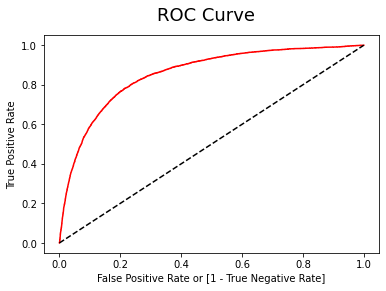

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y, classifier_depoit.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)
print('AUC : ', np.round(auc, 3))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.suptitle('ROC Curve', size=18)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### AUC provides an overall measure of fit of the model, AUC value 0.6 represet a good fit model